**DSCI 100 PROJECT: INDIVIDUAL PORTION**

**Part 1**

The dataset used for this analysis, **players.csv**, contains seven variables: player experience classification, subscription status, email address, total hours played, name, gender, and age. These can be seen in the data frame below:

In [2]:
install.packages("tidyverse")
library(tidyverse)
library(dplyr)
players_data <- read_csv("Data/players.csv")
head(players_data)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


**Data Summary:**

This dataframe, included in the data: *players.csv*, shows each column/variable as well as its respective data type. Note that this tibble shows only a snippet of the complete data, which contains 193 rows, representing the 193 observations made for each variable. Here is a breakdown of each of these variables:

**Experience** ("experience"):
This column, called *experience*, contains information on each player's experience level, providing a range of character (*chr*) values, including *Pro*, *Veteran*, *Amateur*, *Regular*, and *Beginner*. This variable is a qualitative one.

**Subscription Status** ("subscribe"): This column, called *subscribe*, contains information on each player's current subscription status, providing a range of logical values (*lgl*), including *True* or *False*.This variable is a qualitative one.

**Email Address** ("hashedEmail"): This column, called *hashedEmail*, contains information on each player's hashed email address, giving each player's hashed email address as a character value (*chr*). This variable is a qualitative one.

**Hours Played** ("played_hours"): This column, called *played_hours*, contains information on each player's total hours played as a double-precision floating-point number (*dbl*). This variable is a quantitative one.

**Name** ("name"): This column, called *name*, contains information on each player's age. This information is stored as a character value (*chr*). This variable is a qualitative one.

**Gender** ("gender"):This column, called *gender*, contains information on each player's gender. This information is stored as a character value (*chr*). This variable is a qualitative one.

**Age** ("age"):This column, called *age*, contains information on each player's gender. This information is stored as a character value (*chr*). This variable is a quantitative one.

**Summary Statistics for quantitative variables (Hours Played and Age):**

**Hours Played:**

In [3]:
 hours_played_summary <- players_data %>%
  summarise(
    mean_played_hours = mean(played_hours, na.rm = TRUE),
    median_played_hours = median(played_hours, na.rm = TRUE),
    min_played_hours = min(played_hours, na.rm = TRUE),
    max_played_hours = max(played_hours, na.rm = TRUE),
    sd_played_hours = sd(played_hours, na.rm = TRUE))
hours_played_summary

mean_played_hours,median_played_hours,min_played_hours,max_played_hours,sd_played_hours
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5.845918,0.1,0,223.1,28.35734


**Mean:** 5.85

**Median:** 0.10

**Min:** 0.00

**Max:** 223.10

**Standard Deviation:** 28.36

**Age:**

In [4]:
age_summary <- players_data %>%
  summarize(
    mean_age = mean(Age, na.rm = TRUE),
    median_age = median(Age, na.rm = TRUE),
    min_age = min(Age, na.rm = TRUE),
    max_age = max(Age, na.rm = TRUE),
    sd_age = sd(Age, na.rm = TRUE))
age_summary

mean_age,median_age,min_age,max_age,sd_age
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21.13918,19,9,58,7.389687


**Mean:** 21.14

**Median:** 19

**Min:** 9

**Max:** 58

**Standard Deviation:** 7.39

**Potential issues in the data:**
A potential concern with using hours played as a predictor is that some players have values of 0 or very low hours, which may not align with their experience level. Although experience level is not being used as a predictor alongside hours played, these values could indicate recording errors or unreliable data. However, given the relatively large sample size of 193 players, the overall predictions are still likely to be reasonably accurate.

**Part 2**

This report will set out to answer the following question: *What player characteristics and behaviors are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?*

To begin answering this question, the report will primarily focus on exploring the relationship between player experience, hours played, and newsletter subscription. **More specifically, is hours played are reliable predictor of newsletter subscription status.** 

The data described above will be useful in answering the question: **Can player hours played be reliable predictors of newsletter subscription status?**

The dataset will help us answer our question because we can use the played_hours variable in a classification algorithm to predict whether a player will be subscribed to the newsletter. However, some wrangling will have to be done to the data; primarily, the three variables of interest will need to be selected. Using the select function, we can narrow down the data to the following columns: played_hours and subscribe. The next step will be to use *mutate* and *as_factor* functions to convert the *subscribe*, our response variable of interest, to a factor (*fct*) value. This will allow for the employment of a K-NN prediction algorithm to be employed in the classification of players based on hours played. 

**Part 3**

**Load data into R:**

In [5]:
players_data <- read_csv("Data/players.csv")
head(players_data)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


*The dataset above is already in a tidy format*

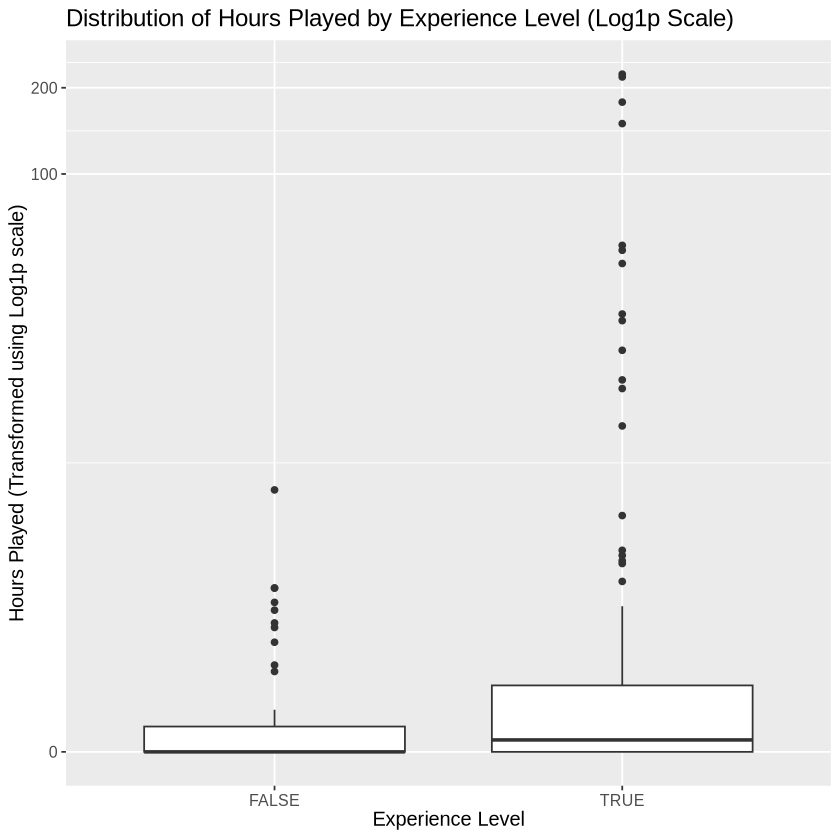

In [22]:
distribution_plot <- players_data %>%
  ggplot(aes(x = subscribe, y = played_hours)) +
  geom_boxplot() +
  scale_y_continuous(trans = "log1p")+ 
  labs(title = "Distribution of Hours Played by Experience Level (Log1p Scale)",
       x = "Experience Level",
       y = "Hours Played (Transformed using Log1p scale)") +
  theme(text = element_text(size = 12)) 

distribution_plot

While making this plot, I ran into a significant issue because of the number of zero values in the hours_played variable; the distribution was extremely skewed. Because of this, making an effective visualisation required the use of the log1p scale to allow the bottom tail of the values and the more extreme outliers to be visible; using a scaling factor of log10 was not applicable because log10(0) is an undefined value. I chose to use a boxplot instead of a histogram to display the distribution because a boxplot allows for a more effective comparison of the center and spread between the distributions. 

**Takeaways:**

From the boxplot, we can see that, despite both values being centered near zero, the distribution of players that are subscribed to the newsletter tends to have more hours played, having both a larger median, IQR, and outliers that are much greater than the False group, which is mostly centered around 0. If I were to make a preliminary prediction as to the nature of the  K-NN model, it would likely classify players with more hours played as being subscribed to the newsletter. 